In [51]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib import cm
from glob import glob

# Loading the data

In [ ]:
def load_results(basedir="./AttractorSamples", index=False):
    results = dict()
    for filen in glob(basedir + "/**/*.npz", recursive=True):
        # Read the npz files
        item = np.load(filen)
        if index:
            n = 0
            label = (*item['experiment'], n)

In [53]:
def load_results(basedir="./AttractorSamples", index=False):
    results = dict()
    for filen in glob(basedir + "/**/*.npz", recursive=True):
        # Read the npz files
        item = np.load(filen)
        if index:
            n = 0
            label = (*item['experiment'], n)
            while label in results.keys():
                n += 1
                label = (*item['experiment'], n)
        else:
            label = tuple(item['experiment'])
        results[label] = item
    return results

results = load_results()
results_large = load_results("./AttractorSamples_large", True)

In [60]:
def plot_single(item, ax, norm=None, cmap='viridis', **formatargs):
    data = item['samples']
    x,y,z = data[:,0], data[:,1], data[:,2]
    vpts = data[:,3]
    
    if norm is None:
        norm = colors.Normalize(vmin=np.min(vpts), vmax=np.max(vpts))
    
    colors = plt.get_cmap(cmap)(norm(vpts))
    ax.scatter(x,y,z, c=colors, **formatargs)
    
    return norm

def plot_group(data, *keys, cmap='viridis', shape=None, figsize=(7,5), **formatargs):
    
    #Determine normalization for color scales
    max_vpt = np.max([np.max(data[key]['samples'][:,3]) for key in keys])
    norm = colors.SymLogNorm(vmin=0, vmax=max_vpt, linthresh=1e-3, linscale=1e-1, base=10)
    
    if shape is None:
        shape = (len(keys), 1)
    
    #Create plot
    fig = plt.figure(figsize=figsize)
    for i,key in enumerate(keys):
        ax = fig.add_subplot(*shape, i+1, projection='3d')
        plot_single(data[key], ax, norm=norm, cmap=cmap, **formatargs)
        ax.set_title('-'.join(data[key]['experiment']))
    
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
    plt.show()

# Plots

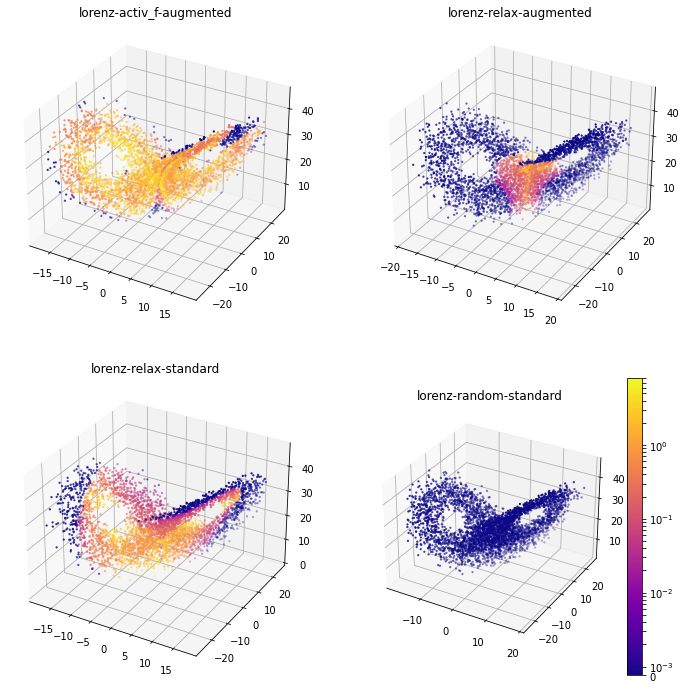

In [48]:
# Lorenz
plot_group(
    results,
    ('lorenz', 'activ_f', 'augmented'),
    ('lorenz', 'relax', 'augmented'),
    ('lorenz', 'relax', 'standard'),
    ('lorenz', 'random', 'standard'),
    shape=(2,2),
    figsize=(12, 12),
    linewidths=0.,
    marker='.',
    cmap='plasma',
)

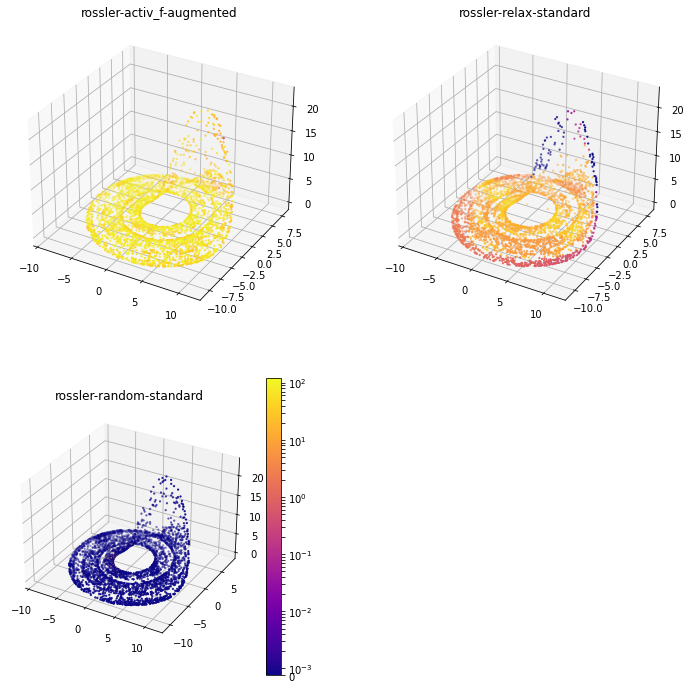

In [49]:
# Rossler
plot_group(
    results,
    ('rossler', 'activ_f', 'augmented'),
    ('rossler', 'relax', 'standard'),
    ('rossler', 'random', 'standard'),
    shape=(2,2),
    figsize=(12, 12),
    linewidths=0.,
    marker='.',
    cmap='plasma',
)

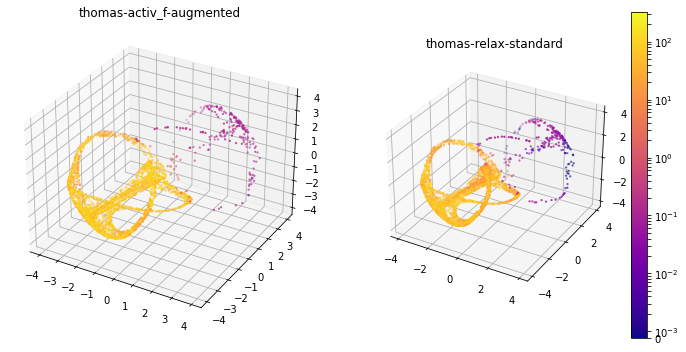

In [50]:
# Thomas
plot_group(
    results,
    ('thomas', 'activ_f', 'augmented'),
    ('thomas', 'relax', 'standard'),
    shape=(1,2),
    figsize=(12, 6),
    linewidths=0.,
    marker='.',
    cmap='plasma',
)

# Lots of plots

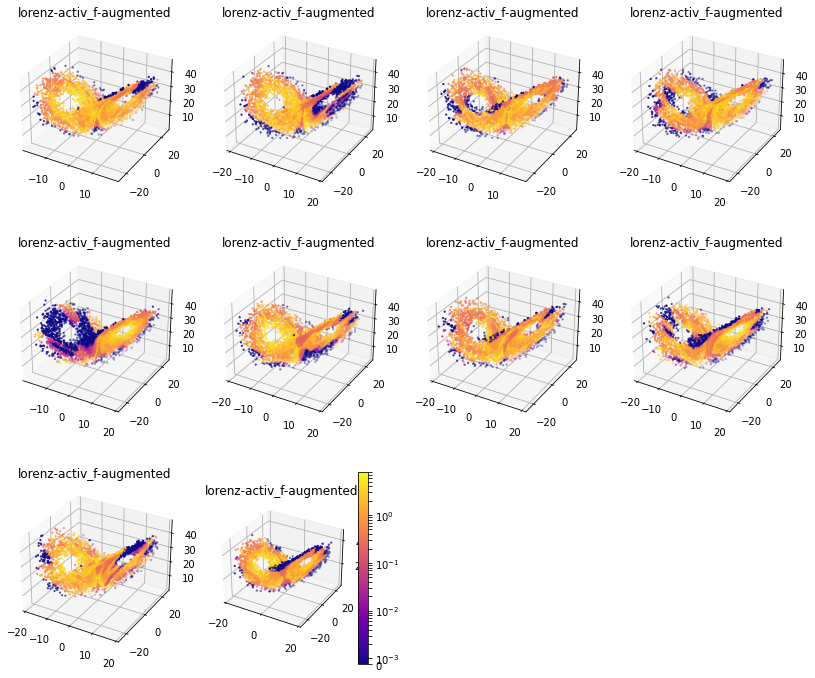

In [61]:
plot_group(
    results_large,
    *[('lorenz', 'activ_f', 'augmented', n) for n in range(10)],
    shape=(3,4),
    figsize=(14, 12),
    linewidths=0.,
    marker='.',
    cmap='plasma',
)

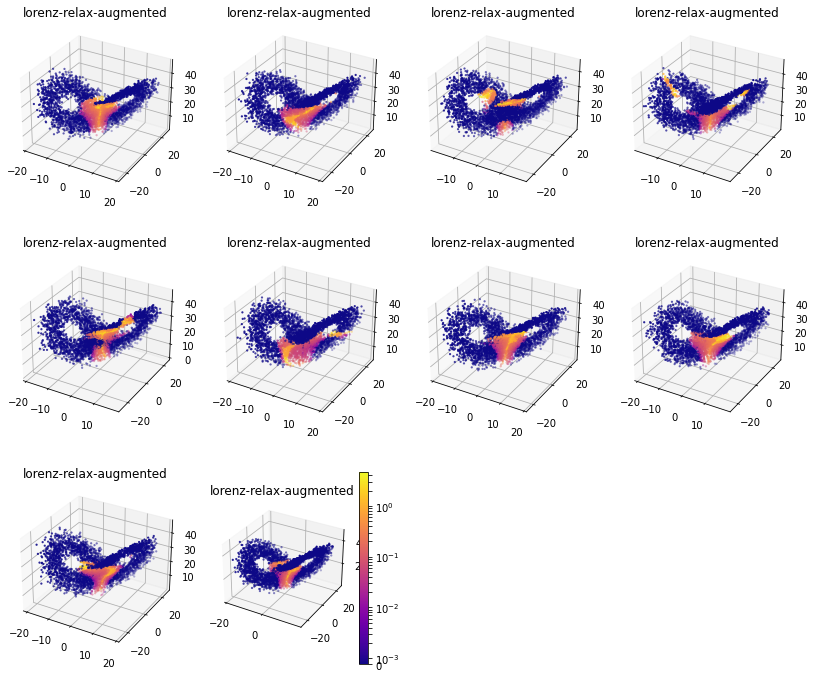

In [57]:
plot_group(
    results_large,
    *[('lorenz', 'relax', 'augmented', n) for n in range(10)],
    shape=(3,4),
    figsize=(14, 12),
    linewidths=0.,
    marker='.',
    cmap='plasma',
)

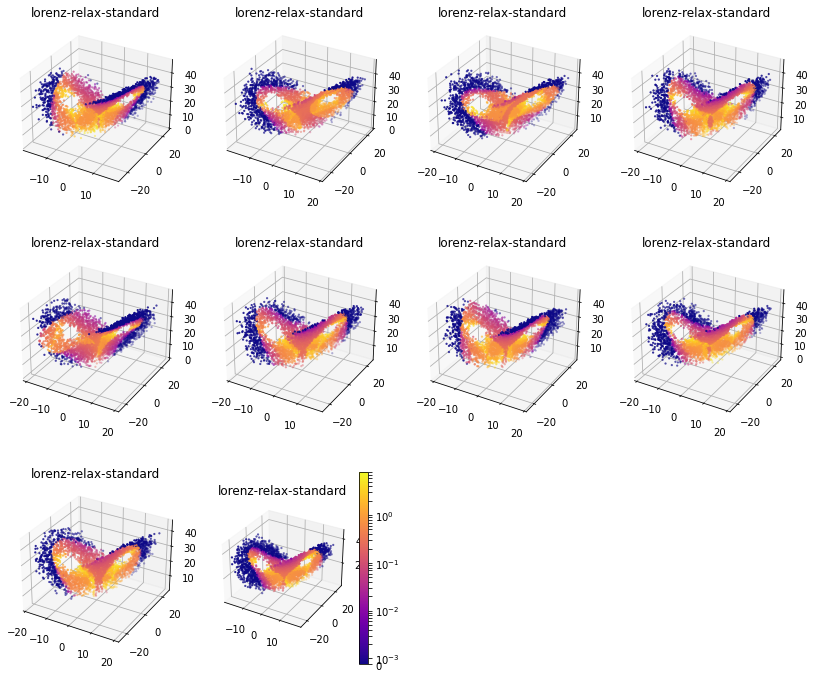

In [62]:
plot_group(
    results_large,
    *[('lorenz', 'relax', 'standard', n) for n in range(10)],
    shape=(3,4),
    figsize=(14, 12),
    linewidths=0.,
    marker='.',
    cmap='plasma',
)

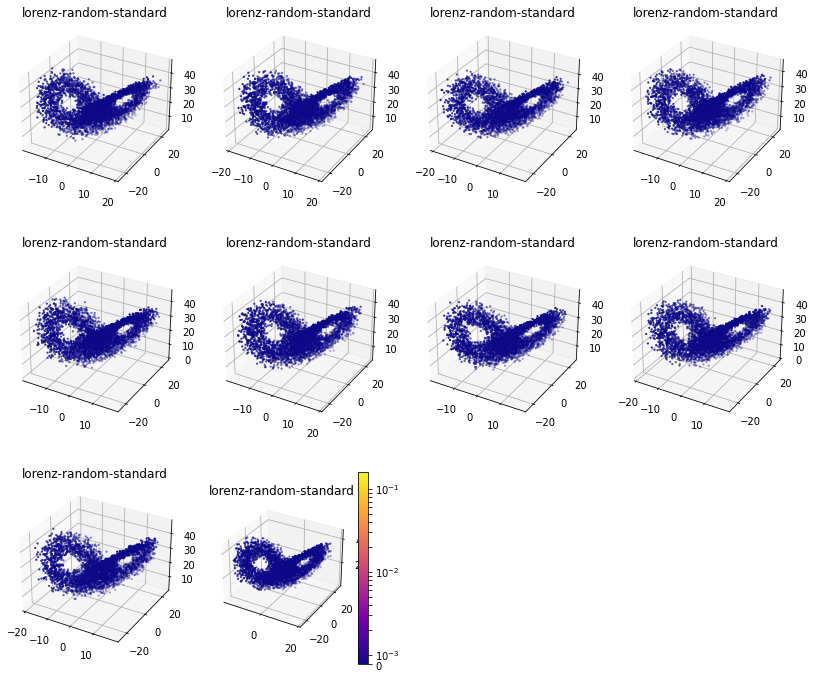

In [63]:
plot_group(
    results_large,
    *[('lorenz', 'random', 'standard', n) for n in range(10)],
    shape=(3,4),
    figsize=(14, 12),
    linewidths=0.,
    marker='.',
    cmap='plasma',
)

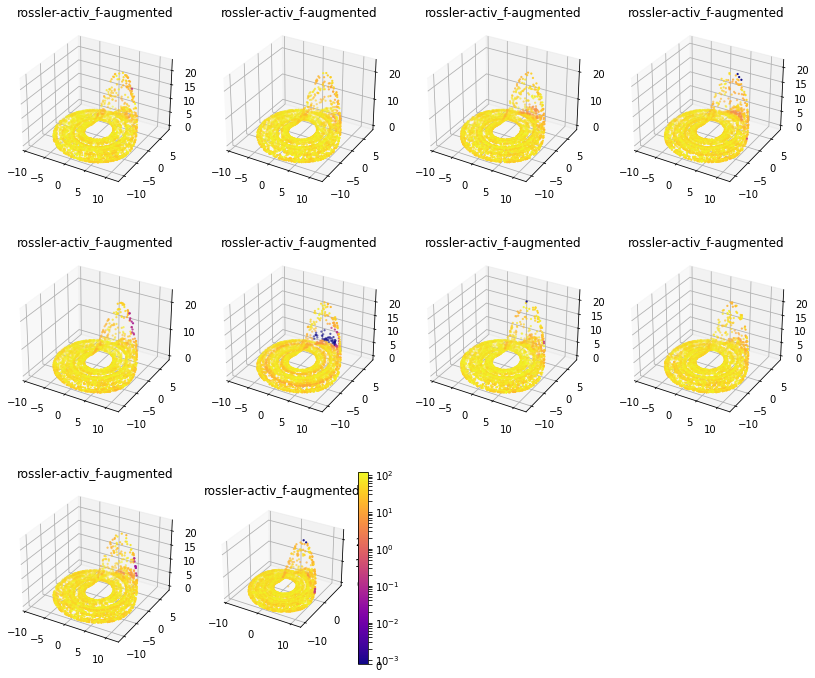

In [64]:
plot_group(
    results_large,
    *[('rossler', 'activ_f', 'augmented', n) for n in range(10)],
    shape=(3,4),
    figsize=(14, 12),
    linewidths=0.,
    marker='.',
    cmap='plasma',
)

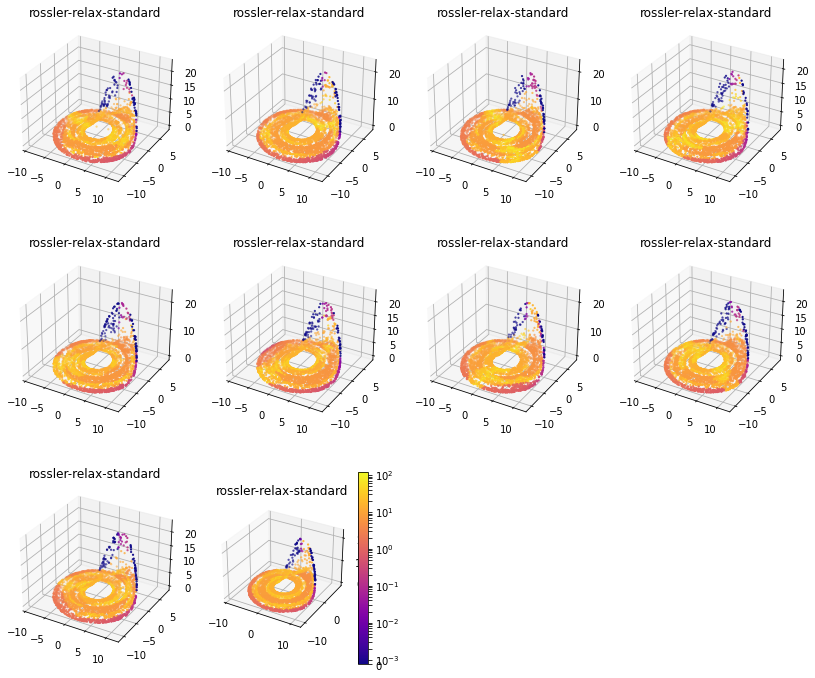

In [65]:
plot_group(
    results_large,
    *[('rossler', 'relax', 'standard', n) for n in range(10)],
    shape=(3,4),
    figsize=(14, 12),
    linewidths=0.,
    marker='.',
    cmap='plasma',
)

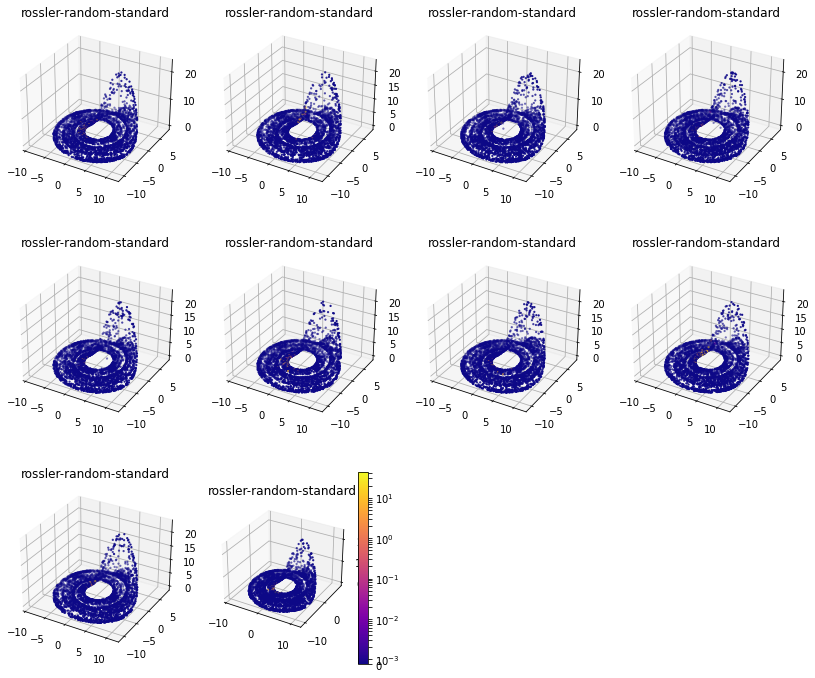

In [66]:
plot_group(
    results_large,
    *[('rossler', 'random', 'standard', n) for n in range(10)],
    shape=(3,4),
    figsize=(14, 12),
    linewidths=0.,
    marker='.',
    cmap='plasma',
)

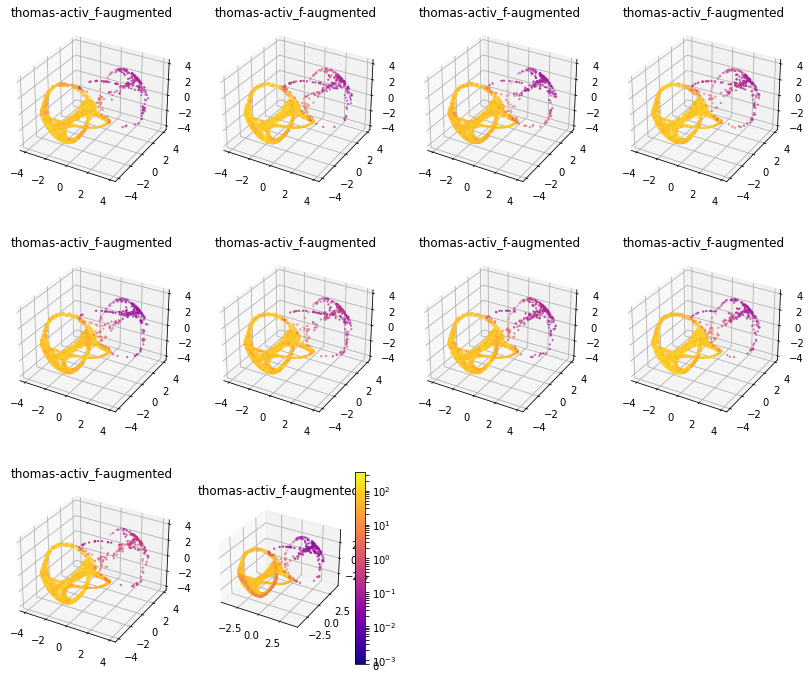

In [68]:
plot_group(
    results_large,
    *[('thomas', 'activ_f', 'augmented', n) for n in range(10)],
    shape=(3,4),
    figsize=(14, 12),
    linewidths=0.,
    marker='.',
    cmap='plasma',
)

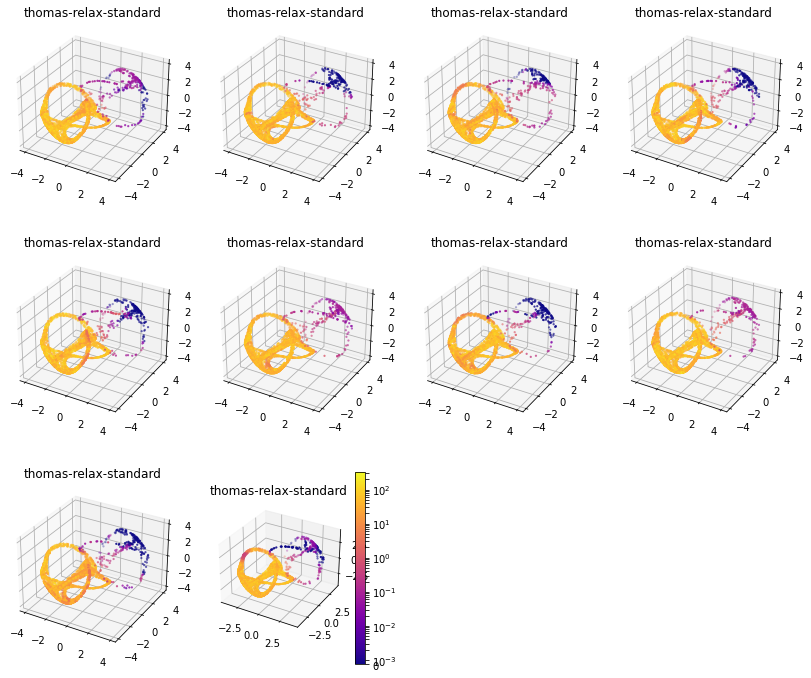

In [67]:
plot_group(
    results_large,
    *[('thomas', 'relax', 'standard', n) for n in range(10)],
    shape=(3,4),
    figsize=(14, 12),
    linewidths=0.,
    marker='.',
    cmap='plasma',
)